# Đồ án Cuối Kỳ - Nhóm 23

## **1. Data Collection**

### **1.1. Chủ đề của bộ dữ liệu mà nhóm lựa chọn**
- Dữ liệu nói về thói quen sử dụng điện thoại thông minh và mức độ “nghiện” điện thoại ở thanh thiếu niên - bao gồm thông tin về thời gian sử dụng, tần suất sử dụng, cũng như các chỉ số liên quan đến sức khỏe, học tập, tâm lý, v.v.
- Bối cảnh thực tế: phản ánh hành vi sử dụng điện thoại thông minh trong nhóm tuổi thiếu niên - từ đó có thể phân tích xem việc dùng điện thoại ảnh hưởng như thế nào đến giấc ngủ, học tập, cảm xúc, sức khỏe tâm thần...

### **1.2. Nguồn gốc của bộ dữ liệu**
- Nền tảng: Kaggle. Link đầy đủ: [Teen Smartphone Usage and Addiction Impact Dataset
](https://www.kaggle.com/datasets/sumedh1507/teen-phone-addiction?brid=0i4ntFyCRqVKUnM6KOK12Q).
- Tác giả: Dataset do người dùng “sumedh1507” đăng tải trên Kaggle.
- Thời gian: dữ liệu được cập nhật công khai vào khoảng 5 tháng trước.

### **1.3. Cấp phép sử dụng bộ dữ liệu**
Bộ dữ liệu được tác giả cấp quyền **CC0** - Creative Commons Zero, nghĩa là tác giả cho phép người dùng có toàn quyền sử dụng bộ dữ liệu này mà không cần xin phép tác giả.

### **1.4. Cách bộ dữ liệu này được thu thập**
- Phương pháp thu thập kết quả: Sử dụng khảo sát.
- Đối tượng mục tiêu và phương pháp lấy mẫu: Học sinh trung học và các sinh viên vừa vào đại học (từ 13-19 tuổi) điền vào mẫu khảo sát.
- Khoảng thời gian thu thập dữ liệu: Dữ liệu được thu thập trong khoảng thời gian 3 tháng tại một số trường học ở thành thị và bán thành thị.
- Bất kỳ hạn chế nào xuất hiện trong quá trình khảo sát: Tác giả không ghi nhận.

### **1.5. Lý do nhóm chọn bộ dữ liệu này**
- Chủ đề “nghiện điện thoại ở thanh thiếu niên” rất thực tiễn và gần gũi - liên quan đến giáo dục, sức khỏe tâm thần, thói quen sống; phù hợp để khám phá ảnh hưởng công nghệ đến xã hội hiện đại, khi mà thế hệ Gen Z đang bị gán rất nhiều "định kiến" về sự phụ thuộc vào công nghệ.
- Ngoài ra, với bộ dữ liệu này, sẽ có rất nhiều insight bổ ích được phân tích. Ví dụ như:
    - Độ tuổi/giới tính nào có tỷ lệ "nghiện" điện thoại thông minh nhiều hơn?
    - Liệu thời gian dùng điện thoại có ảnh hưởng đến mức độ lo âu, giấc ngủ, hay kết quả học tập?
    - Mức độ thân thiết giữa gia đình và con cái có khiến tỷ lệ các bạn sử dụng điện thoại thông minh nhiều hơn?

## **2. Data Exploration**

Để bắt đầu quá trình phân tích dữ liệu, trước tiên cần hiểu rõ cấu trúc, chất lượng và đặc điểm tổng quan của bộ dữ liệu. Việc khám phá dữ liệu giúp nhóm đánh giá mức độ đầy đủ, tính chính xác, cũng như các vấn đề tồn tại trong dữ liệu trước khi tiến hành đặt câu hỏi nghiên cứu và xây dựng mô hình phân tích.

### **2.1. Tổng quan về bộ dữ liệu**
#### 2.1.1. Các thông tin cơ bản

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys, os

project_root = os.path.abspath("..")
sys.path.append(project_root)

from src.data_processing import *
from src.visualization import *

sns.set(style='whitegrid', rc={'figure.figsize': (8,5)})

df = pd.read_csv('../data/raw/teen_phone_addiction_dataset.csv')

In [2]:
print("===== BASIC INFORMATION =====")

# 1. Số dòng
num_rows = df.shape[0]
print(f"Number of rows: {num_rows}")

# 2. Số cột
num_cols = df.shape[1]
print(f"Number of columns: {num_cols}")

# 3. Mỗi dòng đại diện cho điều gì
print("\nEach row represents: One teenager's smartphone usage profile and related behavioral/mental health attributes.")

# 4. Kích thước tổng dataset
dataset_size_bytes = df.memory_usage(deep=True).sum()
dataset_size_mb = dataset_size_bytes / (1024**2)

print(f"\nOverall dataset size: {dataset_size_mb:.2f} MB")

print("\n\n===== FIRST 5 ROWS OF THE DATASET =====")
display(df.head())

===== BASIC INFORMATION =====
Number of rows: 3000
Number of columns: 25

Each row represents: One teenager's smartphone usage profile and related behavioral/mental health attributes.

Overall dataset size: 1.39 MB


===== FIRST 5 ROWS OF THE DATASET =====


,ID,Name,Age,Gender,Location,School_Grade,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,...,Screen_Time_Before_Bed,Phone_Checks_Per_Day,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Phone_Usage_Purpose,Family_Communication,Weekend_Usage_Hours,Addiction_Level
0,1,Shannon Francis,13,Female,Hansonfort,9th,4.0,6.1,78,5,...,1.4,86,19,3.6,1.7,1.2,Browsing,4,8.7,10.0
1,2,Scott Rodriguez,17,Female,Theodorefort,7th,5.5,6.5,70,5,...,0.9,96,9,1.1,4.0,1.8,Browsing,2,5.3,10.0
2,3,Adrian Knox,13,Other,Lindseystad,11th,5.8,5.5,93,8,...,0.5,137,8,0.3,1.5,0.4,Education,6,5.7,9.2
3,4,Brittany Hamilton,18,Female,West Anthony,12th,3.1,3.9,78,8,...,1.4,128,7,3.1,1.6,0.8,Social Media,8,3.0,9.8
4,5,Steven Smith,14,Other,Port Lindsaystad,9th,2.5,6.7,56,4,...,1.0,96,20,2.6,0.9,1.1,Gaming,10,3.7,8.6


#### 2.1.2. Tính toàn vẹn dữ liệu

In [3]:
print("===== DATA INTEGRITY =====")

# 1. Kiểm tra số hàng trùng lặp
dup_count = df.duplicated().sum()
print(f"Number of duplicated rows: {dup_count}")

# Hiển thị các dòng trùng (nếu cần xem chi tiết)
if dup_count > 0:
    display(df[df.duplicated()])

# 2. Kiểm tra số hàng trống hoàn toàn
empty_rows = df.isnull().all(axis=1).sum()
print(f"Number of entirely empty rows: {empty_rows}")

# Hiển thị các dòng trống nếu có
if empty_rows > 0:
    display(df[df.isnull().all(axis=1)])

# 3. Kiểm tra tổng số giá trị thiếu
missing_values_total = df.isnull().sum().sum()
print(f"Total missing values across dataset: {missing_values_total}")

===== DATA INTEGRITY =====
Number of duplicated rows: 0
Number of entirely empty rows: 0
Total missing values across dataset: 0


**1. Các dòng trùng lặp**
- Kết quả kiểm tra cho thấy không có dòng nào bị trùng lặp trong toàn bộ bộ dữ liệu.
- Điều này nghĩa là mỗi dòng dữ liệu đều đại diện cho một người tham gia khác nhau, không có bản ghi bị lặp lại.

**Kết luận**: Không cần xử lý hoặc loại bỏ bất kỳ dòng nào do trùng lặp.

**2. Các dòng trống hoàn toàn**
- Dataset không có bất kỳ dòng nào trống hoàn toàn.
- Tất cả các dòng đều chứa ít nhất một giá trị hợp lệ, nghĩa là không có hàng “rác” trong dữ liệu.

**Kết luận**: Không cần xóa dòng nào vì không có hàng trống.

**3. Giá trị thiếu**
- Kết quả cho thấy dataset có 0 giá trị thiếu trên tất cả các cột.
- Điều này thể hiện dữ liệu được chuẩn hóa và thu thập khá tốt (có thể là do tác giả đặt ràng buộc "bắt buộc điền" ở tất cả các câu hỏi), không cần tiền xử lý cho missing values.

**Kết luận**: Dataset hoàn toàn đầy đủ, không có missing values, thuận lợi cho việc phân tích trực tiếp.

#### 2.1.3. Phân tích các cột dữ liệu

**1. Ý nghĩa từng cột**
Dựa trên mô tả dataset, các cột có ý nghĩa như sau:
- `ID`: Mã định danh của từng người tham gia khảo sát.
- `Name`: Tên của người tham gia.
- `Age`: Tuổi.
- `Gender`: Giới tính.
- `Location`: Khu vực sinh sống.
- `School_Grade`: Khối học hiện tại.
- `Daily_Usage_Hours`: Tổng thời gian (theo giờ) sử dụng điện thoại mỗi ngày.
- `Sleep_Hours`: Số giờ ngủ trung bình mỗi ngày.
- `Academic_Performance`: Điểm học tập ở trường (theo thang điểm 100).
- `Social_Interactions`: Mức độ tương tác xã hội (theo thang điểm 10).
- `Exercise_Hours`: Số giờ tập thể dục mỗi tuần.
- `Anxiety_Level`: Mức độ lo âu (theo thang điểm 10).
- `Depression_Level`: Mức độ trầm cảm (theo thang điểm 10).
- `Self_Esteem`: Lòng tự tôn (theo thang điểm 10).
- `Parental_Control`: Mức độ kiểm soát của phụ huynh (theo thang điểm 10).
- `Screen_Time_Before_Bed`: Số giờ sử dụng điện thoại trước khi bắt đầu ngủ.
- `Phone_Checks_Per_Day`: Số lần kiểm tra điện thoại mỗi ngày.
- `Apps_Used_Daily`: Số ứng dụng sử dụng trong một ngày.
- `Time_on_Social_Media`: Thời gian dùng điện thoại cho việc lướt mạng xã hội.
- `Time_on_Gaming`: Thời gian sử dụng điện thoại để chơi game.
- `Time_on_Education`: Thời gian dùng điện thoại cho mục đích học tập.
- `Phone_Usage_Purpose`: Mục đích sử dụng chính (browsing/gaming/education…).
- `Family_Communication`: Mức độ giao tiếp thường xuyên với gia đình (theo thang điểm 10).
- `Weekend_Usage_Hours`: Số giờ dành ra vào ngày cuối tuần để sử dụng điện thoại.
- `Addiction_Level`: Mức độ nghiện điện thoại.

**2. Những cột quan trọng và phù hợp phân tích**
Tùy hướng nghiên cứu, các cột sau rất có giá trị:
- Phân tích hành vi sử dụng điện thoại:
    - `Daily_Usage_Hours`
    - `Apps_Used_Daily`
    - `Time_on_Social_Media`
    - `Time_on_Gaming`
    - `Time_on_Education`
    - `Screen_Time_Before_Bed`
    - `Phone_Checks_Per_Day`
    - `Phone_Usage_Purpose`
    - `Addiction_Level`
    - `Weekend_Usage_Hours`

- Phân tích tác động đến giấc ngủ, học tập, sức khỏe:
    - `Sleep_Hours`
    - `Academic_Performance`
    - `Exercise_Hours`
    - `Anxiety_Level`
    - `Depression_Level`
    - `Self_Esteem`
      
- Phân tích những yếu tố khách quan tác động:
    - `Social_Interactions`
    - `Parental_Control`
    - `Family_Communication`

- Nhân khẩu học:
    - `Age`
    - `Gender`
    - `School_Grade`

- Dùng cho mô hình dự đoán
Feature tốt cho ML:
    - `Daily_Usage_Hours`
    - `Phone_Checks_Per_Day`
    - `Time_on_Social_Media`
    - `Time_on_Gaming`
    - `Sleep_Hours`
    - `Exercise_Hours`
    - `Academic_Performance`
    - `Social_Interactions`

**3. Những cột nên được loại bỏ**
- `Name`: Dữ liệu định danh, không mang giá trị phân tích nên loại.
- `ID`: Dùng để phân biệt dòng nhưng không có ý nghĩa thống kê nên vẫn giữ để tracking, nhưng loại khỏi phân tích & mô hình ML.
- `Location`: Không có quá nhiều phân tích quan trọng liên quan đến địa điểm nơi ở nên loại.

In [4]:
cols_to_drop = ["Name", "ID", "Location"]

df = df.drop(columns=cols_to_drop)

#### 2.1.4. Loại dữ liệu của từng cột

In [5]:
print("===== DATA TYPES =====")
print(df.dtypes)

# 1. Kiểm tra các cột numeric nhưng lưu dạng object (text)
numeric_suspects = df.select_dtypes(include='object').columns
print("\nColumns stored as object:")
print(numeric_suspects)

# 2. Thử convert để xem cột nào thực ra là số
for col in numeric_suspects:
    try:
        df[col].astype(float)
        print(f"Potential numeric column stored as object: {col}")
    except:
        pass

===== DATA TYPES =====
Age                         int64
Gender                     object
School_Grade               object
Daily_Usage_Hours         float64
Sleep_Hours               float64
Academic_Performance        int64
Social_Interactions         int64
Exercise_Hours            float64
Anxiety_Level               int64
Depression_Level            int64
Self_Esteem                 int64
Parental_Control            int64
Screen_Time_Before_Bed    float64
Phone_Checks_Per_Day        int64
Apps_Used_Daily             int64
Time_on_Social_Media      float64
Time_on_Gaming            float64
Time_on_Education         float64
Phone_Usage_Purpose        object
Family_Communication        int64
Weekend_Usage_Hours       float64
Addiction_Level           float64
dtype: object

Columns stored as object:
Index(['Gender', 'School_Grade', 'Phone_Usage_Purpose'], dtype='object')


Một số cột hiện đang có kiểu `object` nhưng thực chất là thông tin phân loại (`categorical`), không phải kiểu chuỗi thuần: `Gender`, `Phone_Usage_Purpose`. Ngoài ra, cần chuyển `School_Grade` về kiểu dữ liệu `int` để thuận tiện cho việc phân tích. 

In [6]:
# 1. Chuyển thành categorical
cat_cols = ['Gender', 'Phone_Usage_Purpose']
for col in cat_cols:
    df[col] = df[col].astype('category')

# 2. Chuyển School_Grade thành int
df['School_Grade'] = df['School_Grade'].str.extract(r'(\d+)').astype(int)
df['School_Grade'] = df['School_Grade'].astype('int64')

print("===== DATA TYPES =====")
print(df.dtypes)

===== DATA TYPES =====
Age                          int64
Gender                    category
School_Grade                 int64
Daily_Usage_Hours          float64
Sleep_Hours                float64
Academic_Performance         int64
Social_Interactions          int64
Exercise_Hours             float64
Anxiety_Level                int64
Depression_Level             int64
Self_Esteem                  int64
Parental_Control             int64
Screen_Time_Before_Bed     float64
Phone_Checks_Per_Day         int64
Apps_Used_Daily              int64
Time_on_Social_Media       float64
Time_on_Gaming             float64
Time_on_Education          float64
Phone_Usage_Purpose       category
Family_Communication         int64
Weekend_Usage_Hours        float64
Addiction_Level            float64
dtype: object


### **2.2. Phân tích các cột Numeric**
#### 2.2.1. Distribution & Central Tendency

Numeric columns: ['Age', 'School_Grade', 'Daily_Usage_Hours', 'Sleep_Hours', 'Academic_Performance', 'Social_Interactions', 'Exercise_Hours', 'Anxiety_Level', 'Depression_Level', 'Self_Esteem', 'Parental_Control', 'Screen_Time_Before_Bed', 'Phone_Checks_Per_Day', 'Apps_Used_Daily', 'Time_on_Social_Media', 'Time_on_Gaming', 'Time_on_Education', 'Family_Communication', 'Weekend_Usage_Hours', 'Addiction_Level']

===== NUMERICAL SUMMARY STATISTICS =====


,mean,median,std
Age,15.969667,16.0,1.989489
School_Grade,9.518667,9.0,1.715605
Daily_Usage_Hours,5.020667,5.0,1.956501
Sleep_Hours,6.489767,6.5,1.490713
Academic_Performance,74.947333,75.0,14.684156
Social_Interactions,5.097667,5.0,3.139333
Exercise_Hours,1.040667,1.0,0.734620
Anxiety_Level,5.590000,6.0,2.890678
Depression_Level,5.460333,5.0,2.871557
Self_Esteem,5.546333,6.0,2.860754


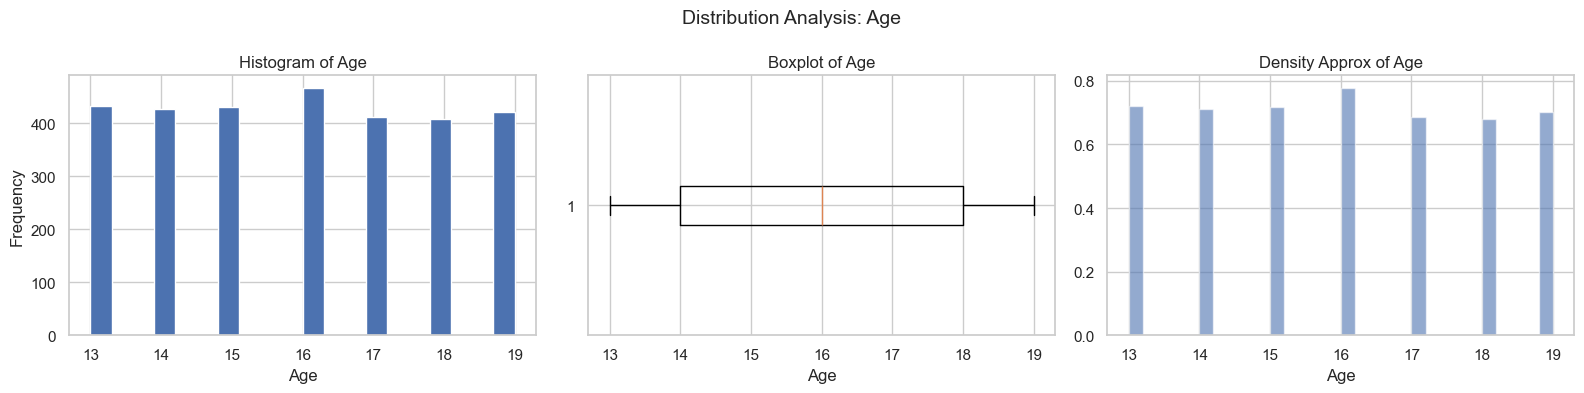

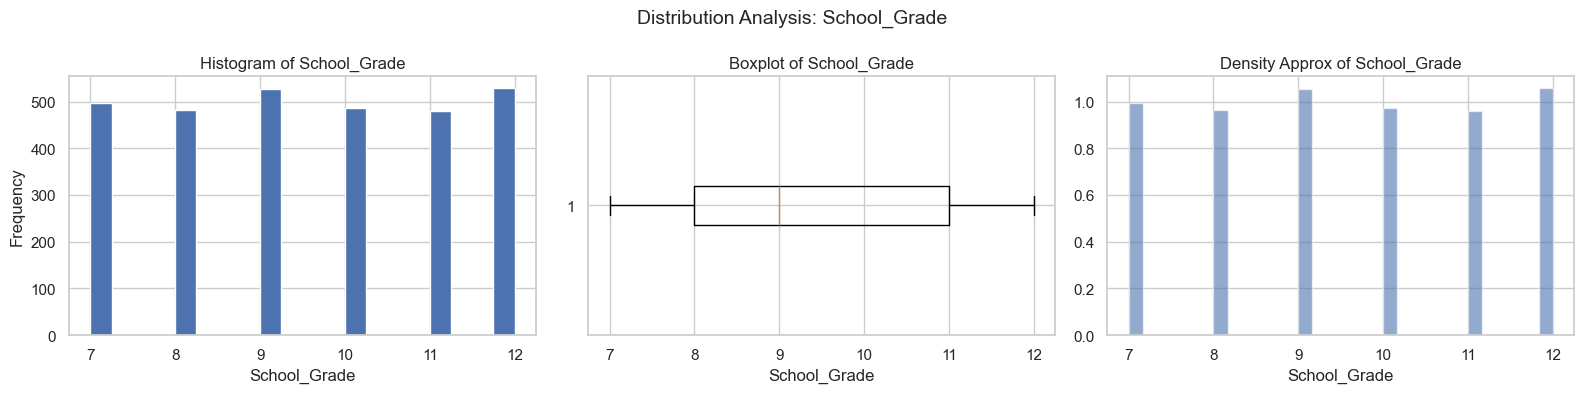

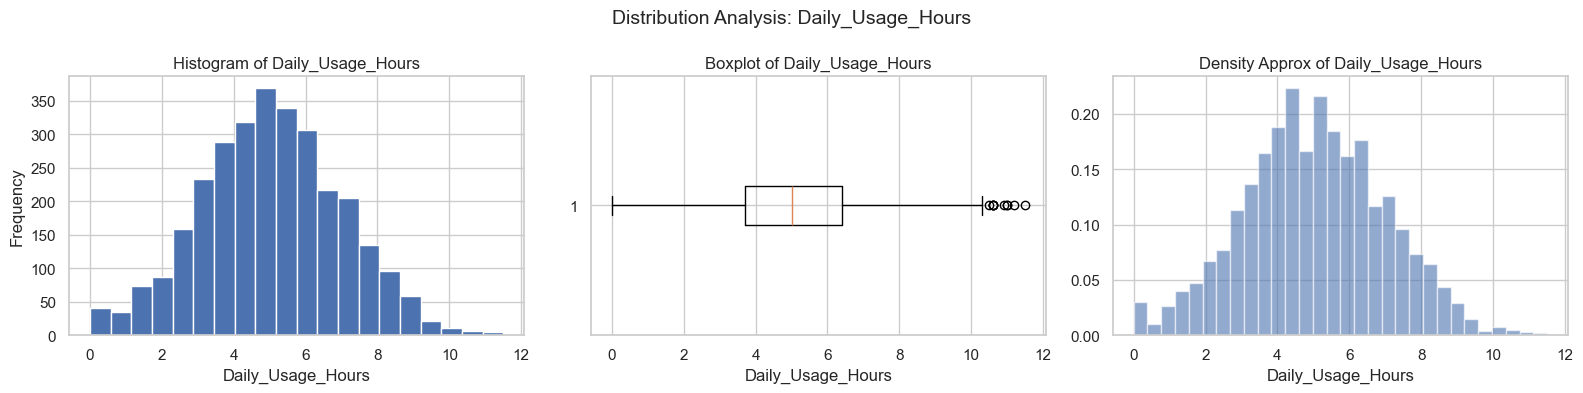

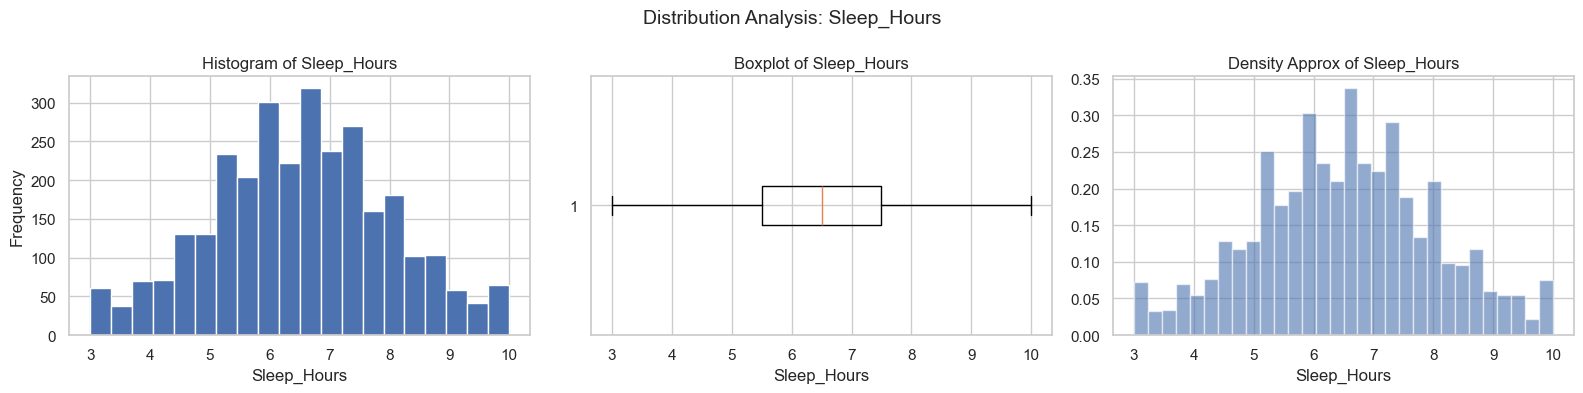

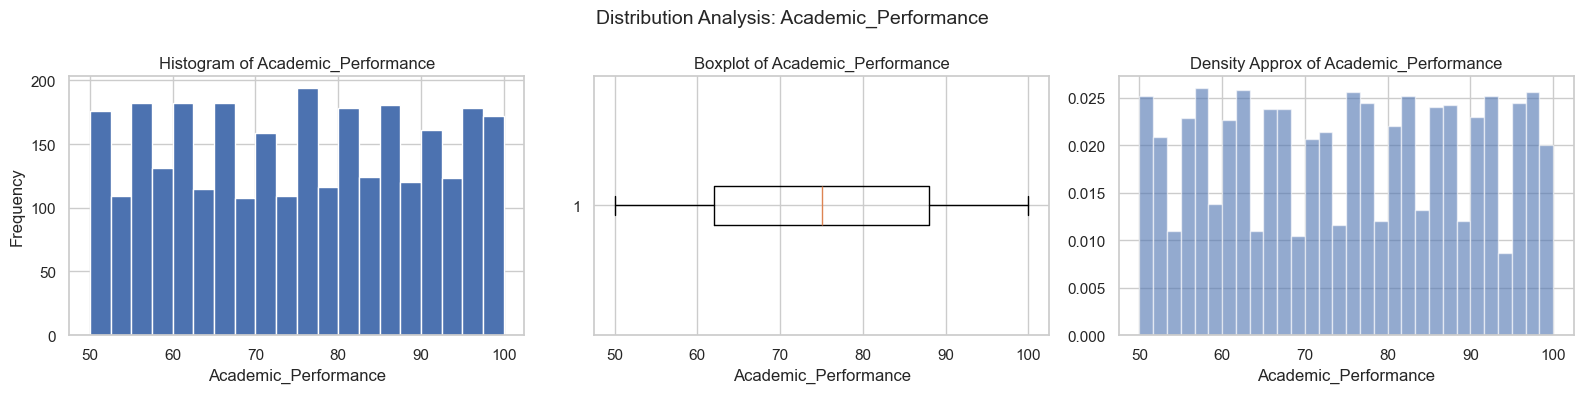

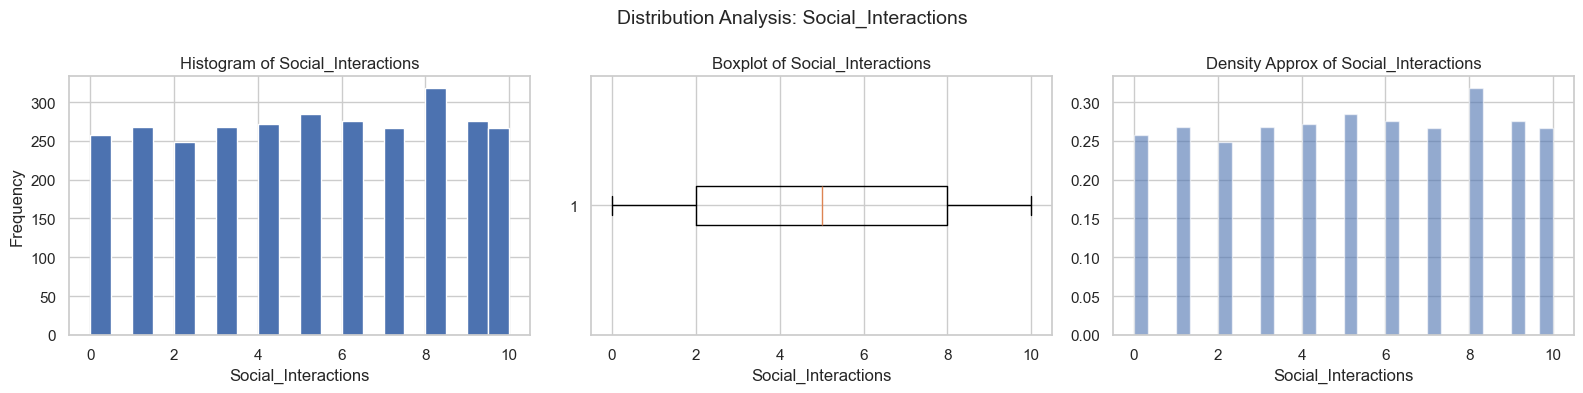

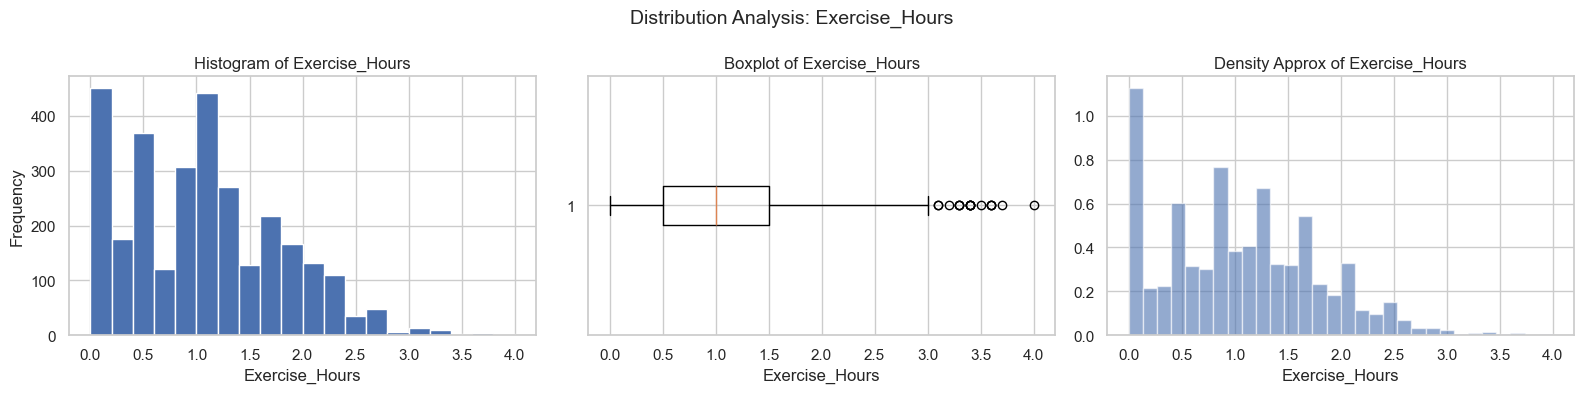

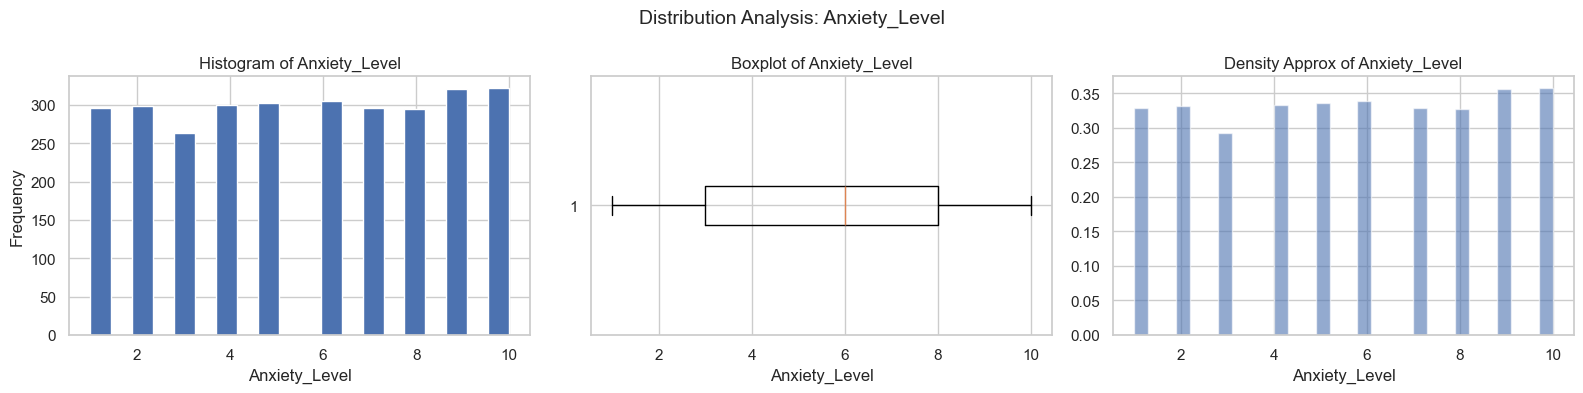

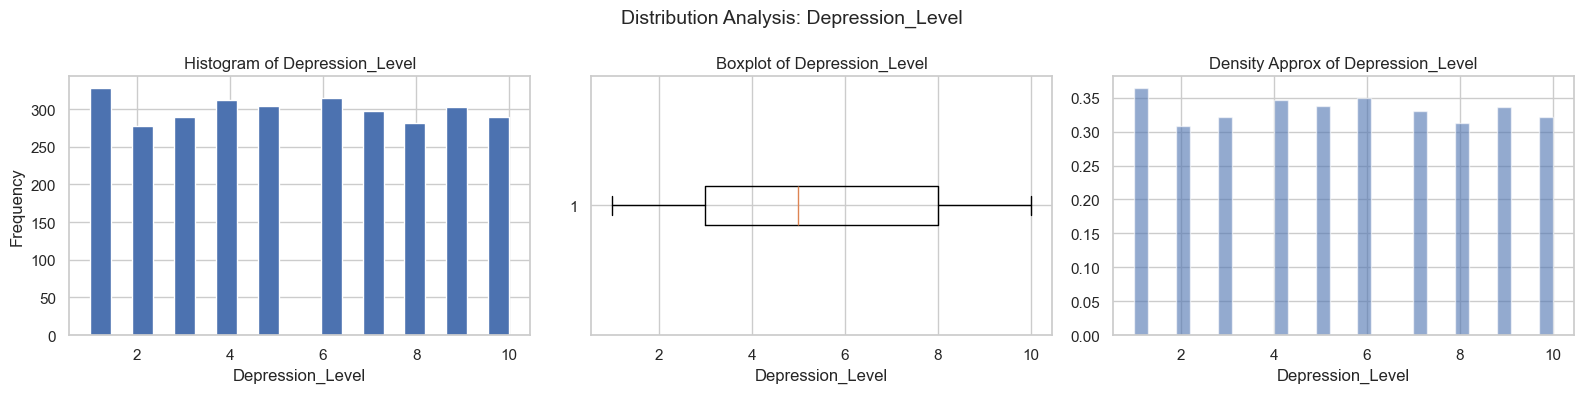

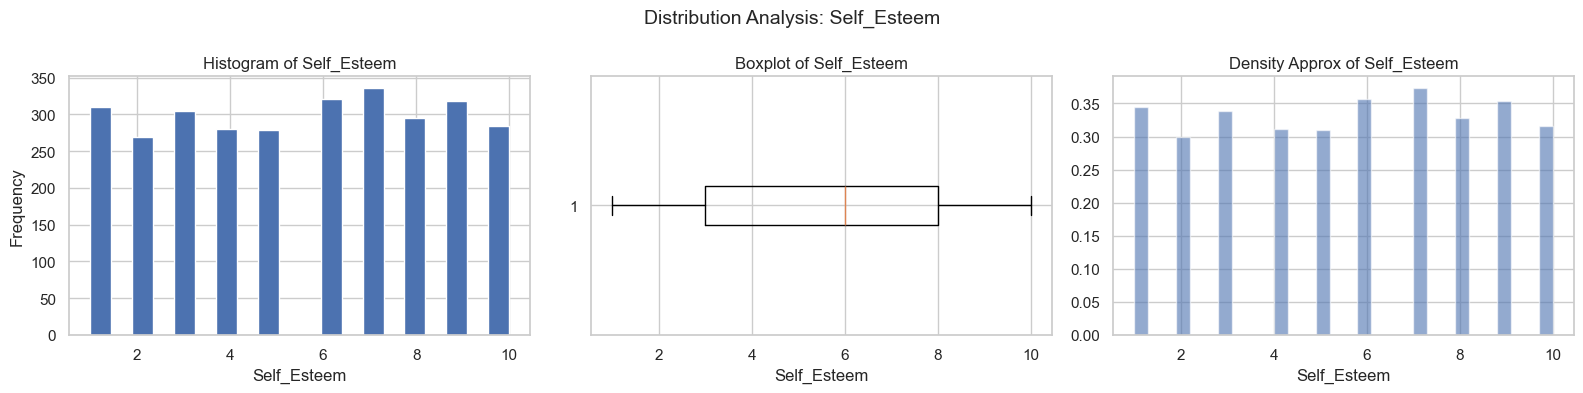

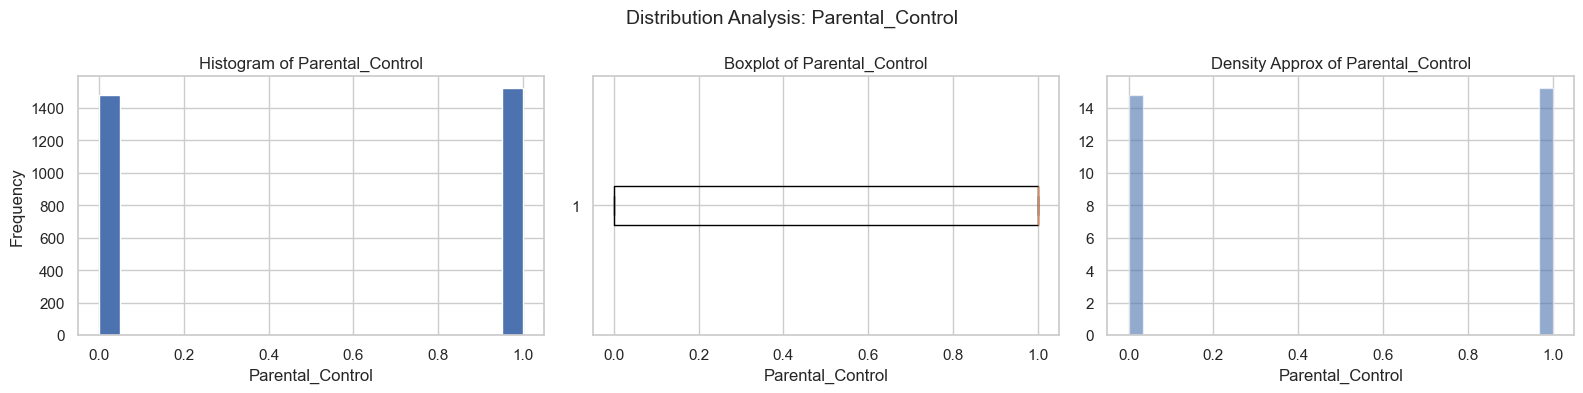

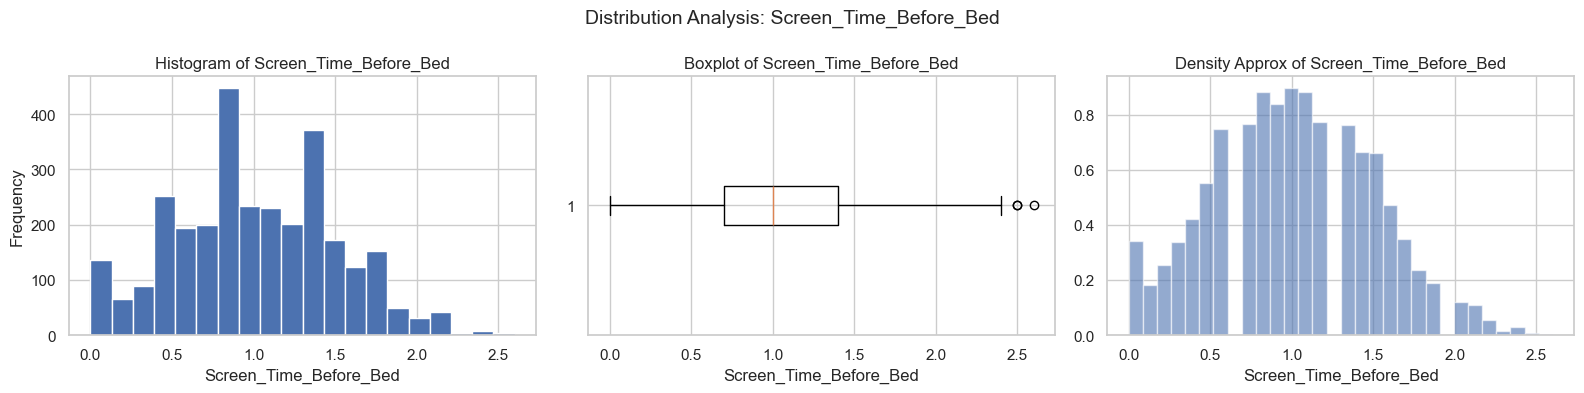

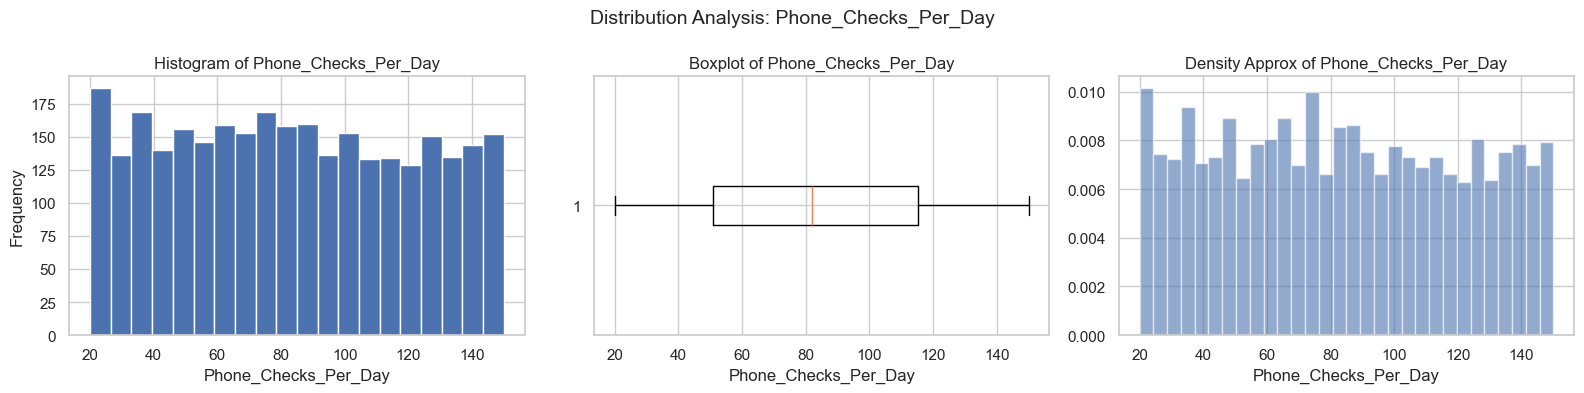

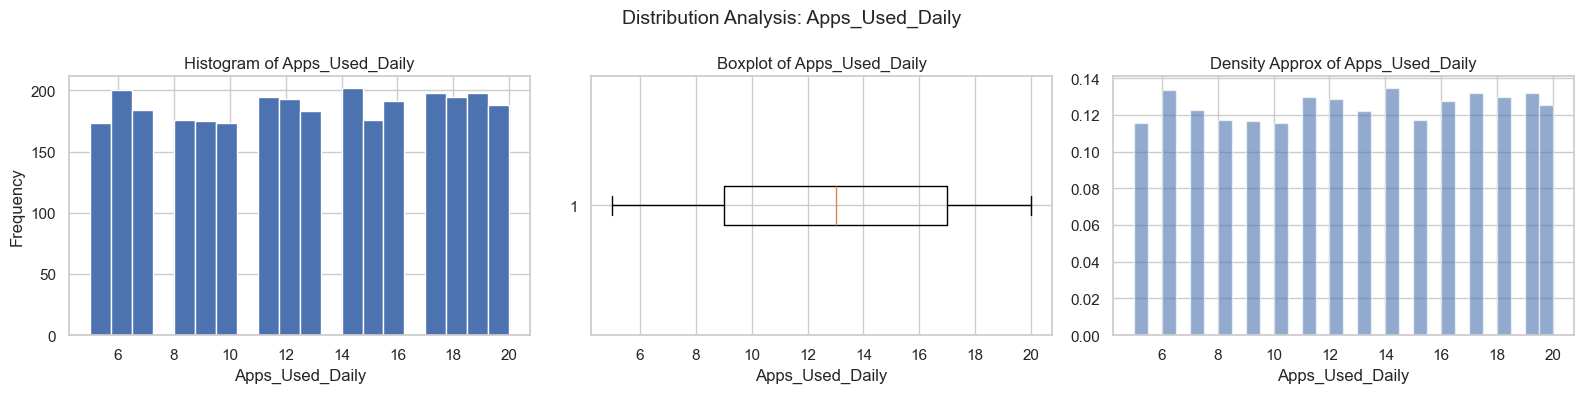

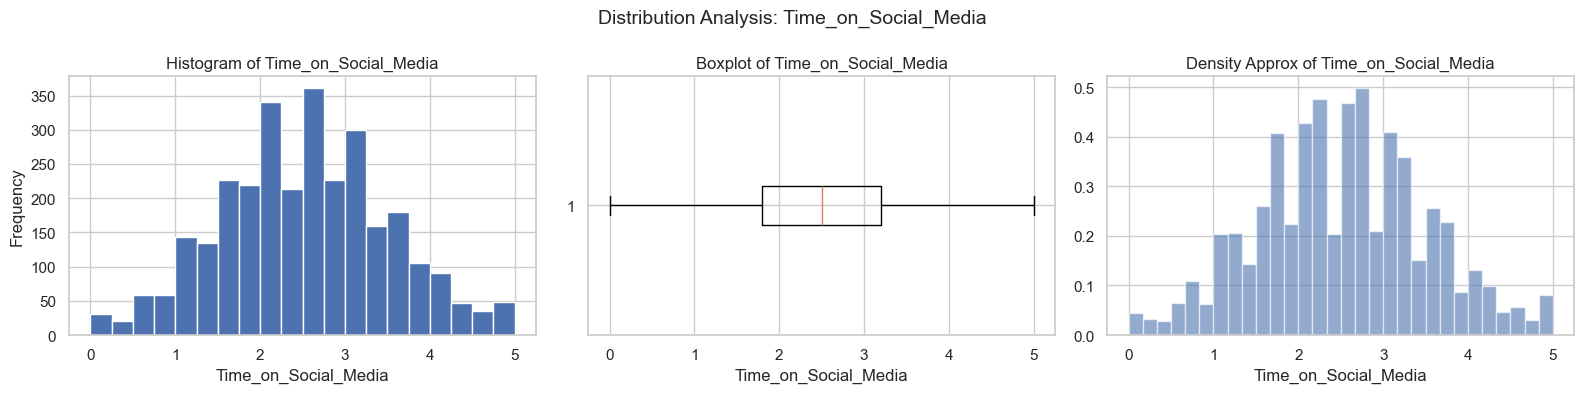

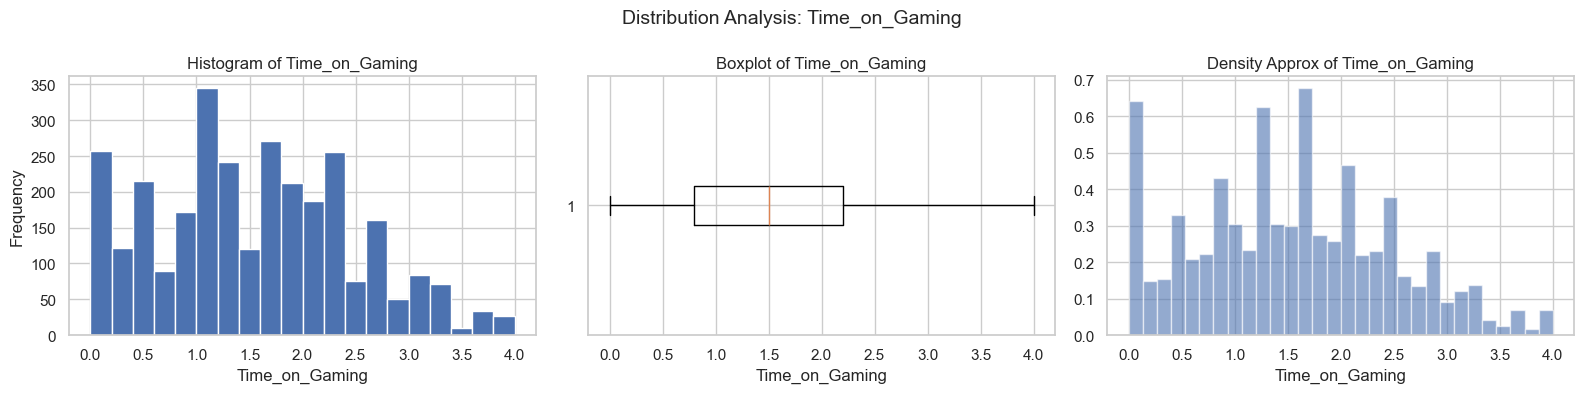

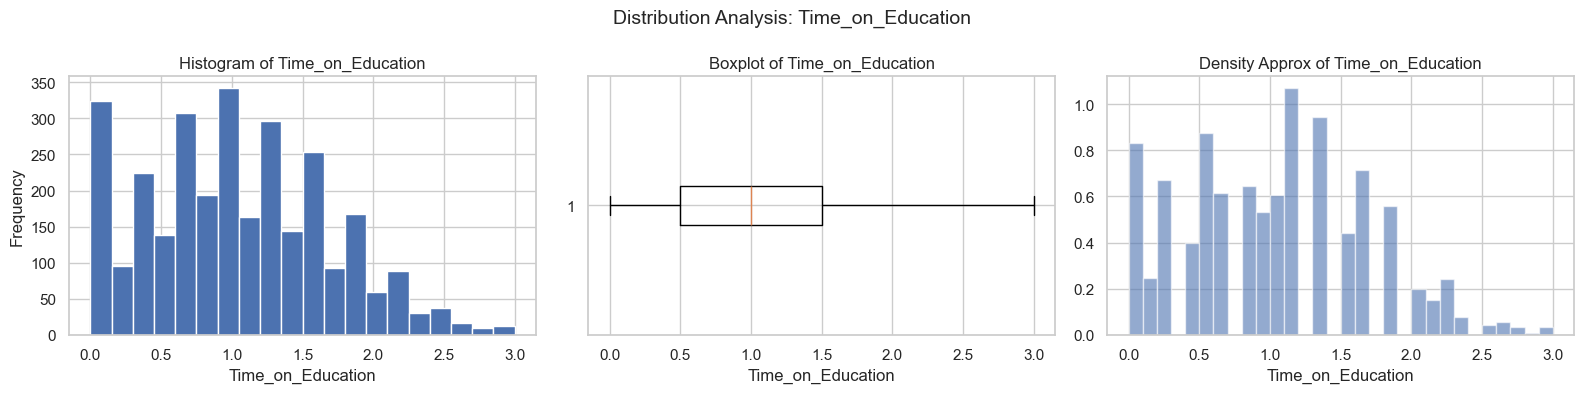

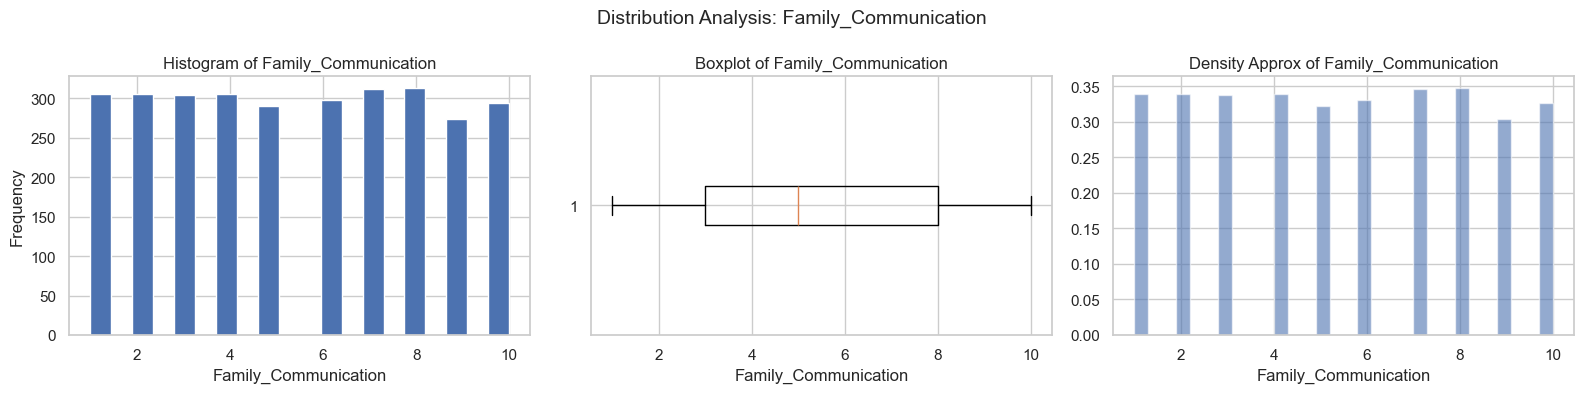

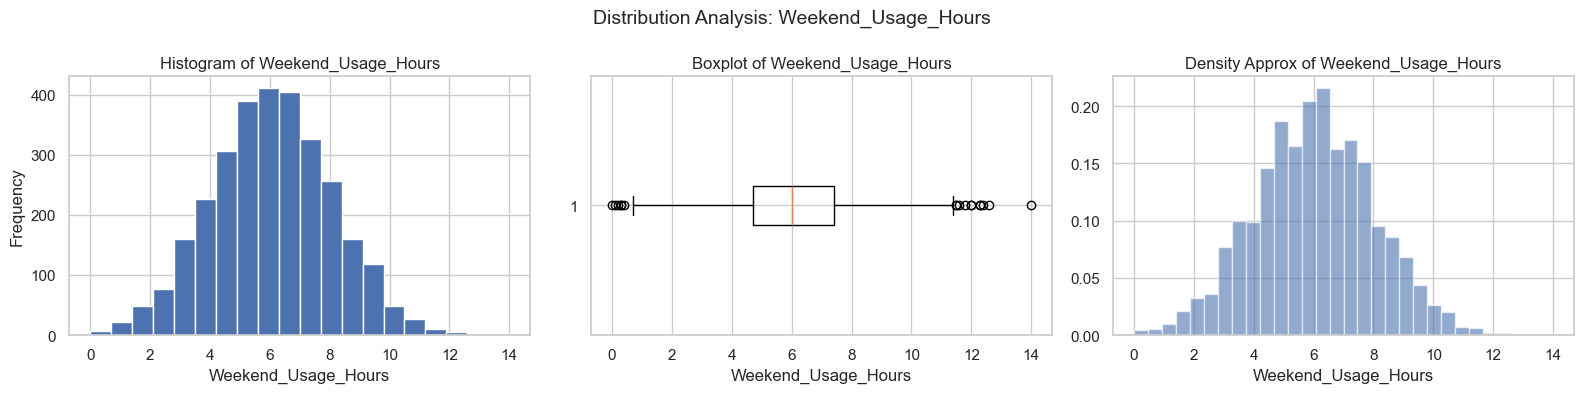

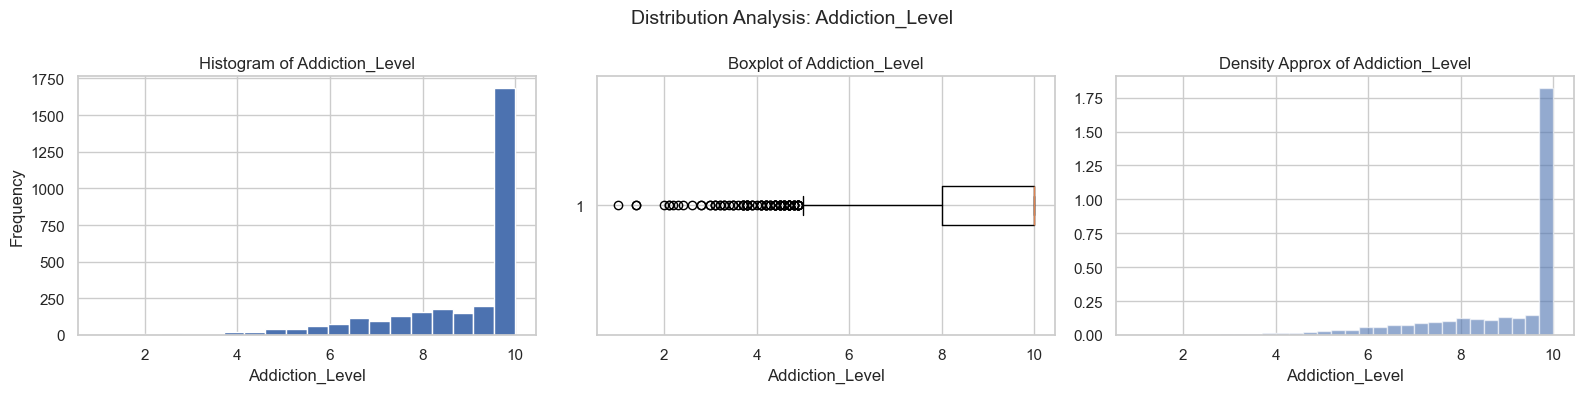

In [7]:
# 1. Lấy danh sách các cột dạng numerical
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("Numeric columns:", list(numeric_cols))

# 2. Bảng thống kê mean – median – std
stats = df[numeric_cols].agg(['mean', 'median', 'std']).T
print("\n===== NUMERICAL SUMMARY STATISTICS =====")
display(stats)

# 3. Vẽ biểu đồ
plot_all_numeric(df)

#### 2.2.2. Range & Outliers

In [8]:
# 1. Tính min – max
range_stats = df[numeric_cols].agg(['min', 'max']).T

print("===== MIN & MAX VALUES =====")
display(range_stats)

===== MIN & MAX VALUES =====


,min,max
Age,13.0,19.0
School_Grade,7.0,12.0
Daily_Usage_Hours,0.0,11.5
Sleep_Hours,3.0,10.0
Academic_Performance,50.0,100.0
Social_Interactions,0.0,10.0
Exercise_Hours,0.0,4.0
Anxiety_Level,1.0,10.0
Depression_Level,1.0,10.0
Self_Esteem,1.0,10.0


Nhìn sơ lược có thể thấy: Tất cả các giá trị min-max của các cột kiểu numeric đều **hợp lệ**.


===== OUTLIER ANALYSIS: Age =====
IQR Lower bound: 8.00, Upper bound: 24.00
IQR Outliers count: 0
Z-score Outliers count: 0


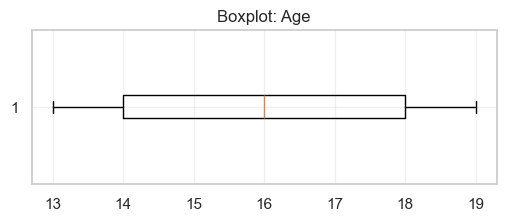


===== OUTLIER ANALYSIS: School_Grade =====
IQR Lower bound: 3.50, Upper bound: 15.50
IQR Outliers count: 0
Z-score Outliers count: 0


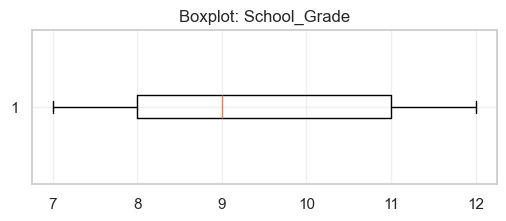


===== OUTLIER ANALYSIS: Daily_Usage_Hours =====
IQR Lower bound: -0.35, Upper bound: 10.45
IQR Outliers count: 10
Z-score Outliers count: 5


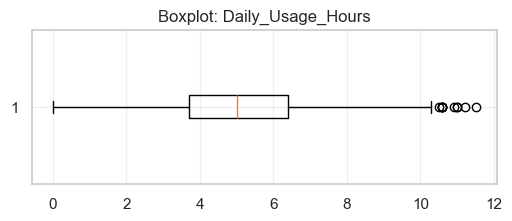


===== OUTLIER ANALYSIS: Sleep_Hours =====
IQR Lower bound: 2.50, Upper bound: 10.50
IQR Outliers count: 0
Z-score Outliers count: 0


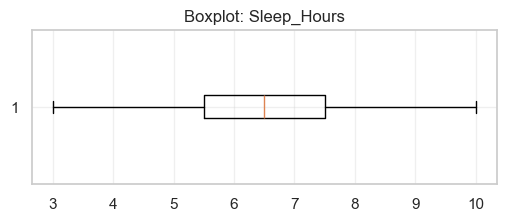


===== OUTLIER ANALYSIS: Academic_Performance =====
IQR Lower bound: 23.00, Upper bound: 127.00
IQR Outliers count: 0
Z-score Outliers count: 0


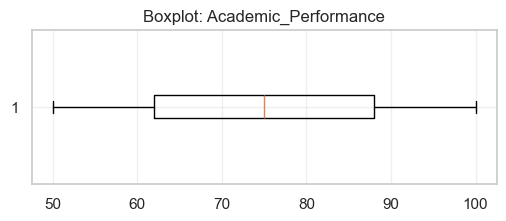


===== OUTLIER ANALYSIS: Social_Interactions =====
IQR Lower bound: -7.00, Upper bound: 17.00
IQR Outliers count: 0
Z-score Outliers count: 0


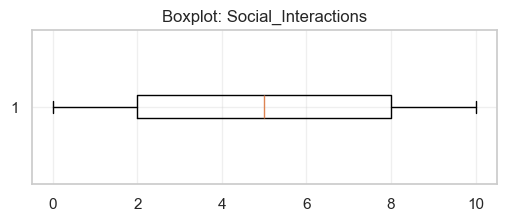


===== OUTLIER ANALYSIS: Exercise_Hours =====
IQR Lower bound: -1.00, Upper bound: 3.00
IQR Outliers count: 17
Z-score Outliers count: 14


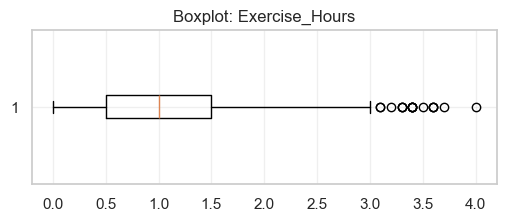


===== OUTLIER ANALYSIS: Anxiety_Level =====
IQR Lower bound: -4.50, Upper bound: 15.50
IQR Outliers count: 0
Z-score Outliers count: 0


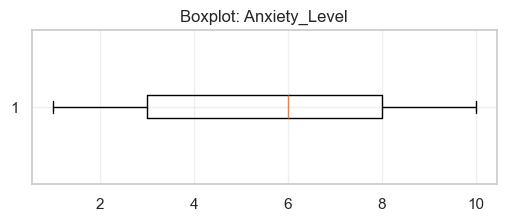


===== OUTLIER ANALYSIS: Depression_Level =====
IQR Lower bound: -4.50, Upper bound: 15.50
IQR Outliers count: 0
Z-score Outliers count: 0


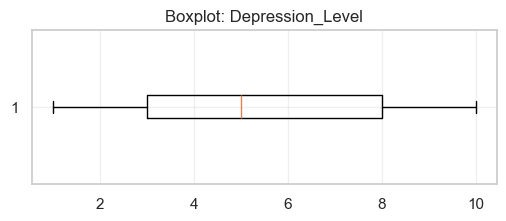


===== OUTLIER ANALYSIS: Self_Esteem =====
IQR Lower bound: -4.50, Upper bound: 15.50
IQR Outliers count: 0
Z-score Outliers count: 0


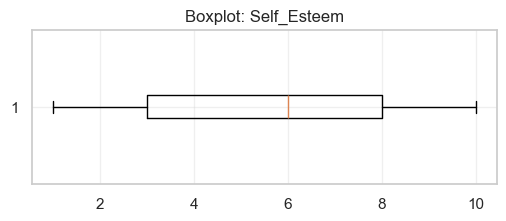


===== OUTLIER ANALYSIS: Parental_Control =====
IQR Lower bound: -1.50, Upper bound: 2.50
IQR Outliers count: 0
Z-score Outliers count: 0


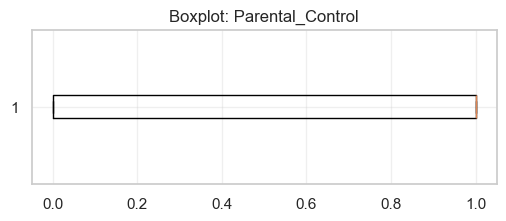


===== OUTLIER ANALYSIS: Screen_Time_Before_Bed =====
IQR Lower bound: -0.35, Upper bound: 2.45
IQR Outliers count: 3
Z-score Outliers count: 3


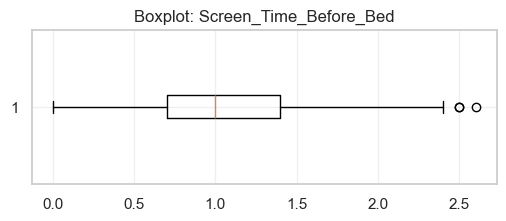


===== OUTLIER ANALYSIS: Phone_Checks_Per_Day =====
IQR Lower bound: -45.38, Upper bound: 211.62
IQR Outliers count: 0
Z-score Outliers count: 0


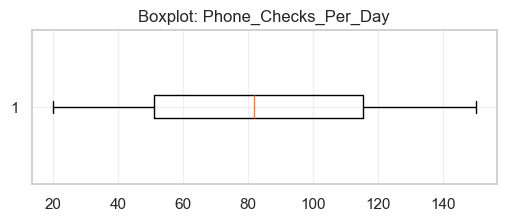


===== OUTLIER ANALYSIS: Apps_Used_Daily =====
IQR Lower bound: -3.00, Upper bound: 29.00
IQR Outliers count: 0
Z-score Outliers count: 0


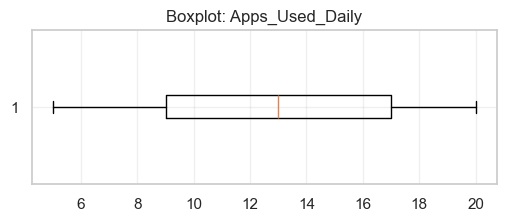


===== OUTLIER ANALYSIS: Time_on_Social_Media =====
IQR Lower bound: -0.30, Upper bound: 5.30
IQR Outliers count: 0
Z-score Outliers count: 0


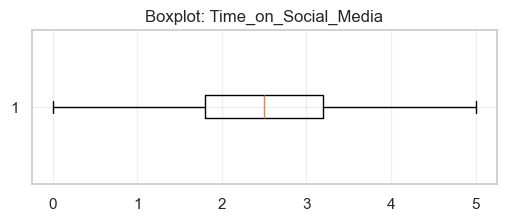


===== OUTLIER ANALYSIS: Time_on_Gaming =====
IQR Lower bound: -1.30, Upper bound: 4.30
IQR Outliers count: 0
Z-score Outliers count: 0


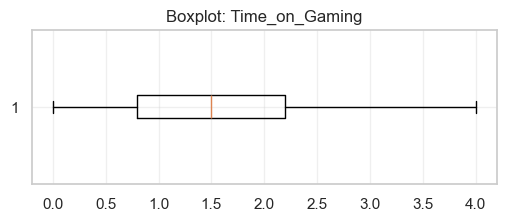


===== OUTLIER ANALYSIS: Time_on_Education =====
IQR Lower bound: -1.00, Upper bound: 3.00
IQR Outliers count: 0
Z-score Outliers count: 10


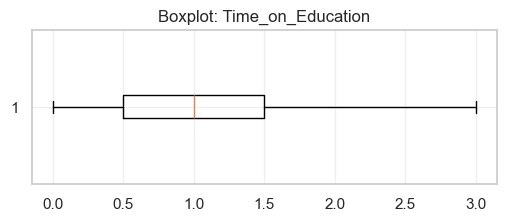


===== OUTLIER ANALYSIS: Family_Communication =====
IQR Lower bound: -4.50, Upper bound: 15.50
IQR Outliers count: 0
Z-score Outliers count: 0


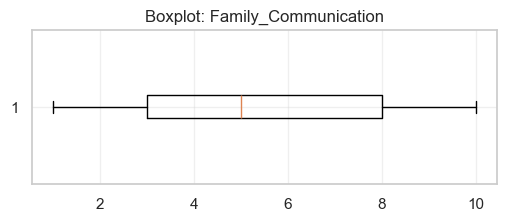


===== OUTLIER ANALYSIS: Weekend_Usage_Hours =====
IQR Lower bound: 0.65, Upper bound: 11.45
IQR Outliers count: 17
Z-score Outliers count: 5


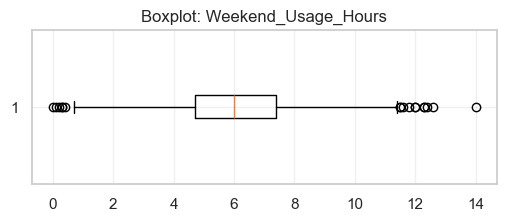


===== OUTLIER ANALYSIS: Addiction_Level =====
IQR Lower bound: 5.00, Upper bound: 13.00
IQR Outliers count: 96
Z-score Outliers count: 42


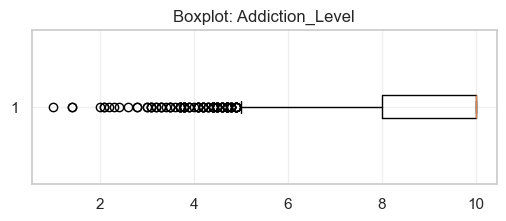

In [9]:
check_outliers_all(df)

Dựa trên kết quả phân tích outliers bằng IQR, Z-Score và Boxplot, chúng em phân loại các outliers thành hai nhóm:

1. Nhóm không có/có số lượng ít outliers: `Age`, `School_Grade`, `Sleep_Hours`, `Academic_Performance`, `Social_Interactions`, `Anxiety_Level`, `Depression_Level`, `Self_Esteem`, `Parental_Control`, `Phone_Checks_Per_Day`, `Apps_Used_Daily`, `Time_on_Social_Media`, `Time_on_Gaming`, `Family_Communication`. Các phân phối này ổn định.

2. Nhóm có outliers nhưng hợp lý: `Daily_Usage_Hours`, `Exercise_Hours`, `Screen_Time_Before_Bed`, `Time_on_Education`, `Weekend_Usage_Hours`.
Riêng `Addiction_Level` được đo trên thang điểm từ 0 đến 10, có 96 outliers (IQR) và 42 outliers (Z-score). Do đó, các điểm bị đánh dấu là outlier chủ yếu là những trường hợp có mức nghiện thấp (nhỏ hơn 5), chứ không phải các giá trị vượt ngoài miền định nghĩa. Điều này phản ánh rằng đa số đối tượng khảo sát có mức độ nghiện điện thoại tương đối cao, khiến các trường hợp có mức nghiện thấp trở thành giá trị outliers.


Nhìn chung, các giá trị này hoàn toàn hợp lý về mặt ngữ nghĩa và **không phải là lỗi nhập liệu**.

#### 2.2.3. Chất lượng của bộ dữ liệu

In [10]:
# 1. Kiểm tra % missing values
missing_percent = df.isnull().mean() * 100
print("===== MISSING VALUE PERCENTAGE =====")
display(missing_percent)

===== MISSING VALUE PERCENTAGE =====


Age                       0.0
Gender                    0.0
School_Grade              0.0
Daily_Usage_Hours         0.0
Sleep_Hours               0.0
Academic_Performance      0.0
Social_Interactions       0.0
Exercise_Hours            0.0
Anxiety_Level             0.0
Depression_Level          0.0
Self_Esteem               0.0
Parental_Control          0.0
Screen_Time_Before_Bed    0.0
Phone_Checks_Per_Day      0.0
Apps_Used_Daily           0.0
Time_on_Social_Media      0.0
Time_on_Gaming            0.0
Time_on_Education         0.0
Phone_Usage_Purpose       0.0
Family_Communication      0.0
Weekend_Usage_Hours       0.0
Addiction_Level           0.0
dtype: float64

In [11]:
# 2. Kiểm tra impossible values cho từng dạng biến

## Kiểm tra các biến phải luôn >= 0
impossible_negatives = (df[numeric_cols] < 0).any()
print("===== NEGATIVE VALUE CHECK =====")
display(impossible_negatives)

## Kiểm tra các biến dạng “hours” > 24 hoặc < 0
hour_columns = [
    'Daily_Usage_Hours', 'Sleep_Hours', 'Exercise_Hours',
    'Screen_Time_Before_Bed', 'Weekend_Usage_Hours',
    'Time_on_Social_Media', 'Time_on_Gaming', 'Time_on_Education'
]

for col in hour_columns:
    invalid = df[(df[col] < 0) | (df[col] > 24)]
    print(f"{col}: {len(invalid)} invalid rows")

## Kiểm tra thang đo
scale_cols = [
    'Anxiety_Level', 'Depression_Level', 'Self_Esteem',
    'Parental_Control', 'Family_Communication', 'Addiction_Level'
]

for col in scale_cols:
    invalid = df[(df[col] < 0) | (df[col] > 10)]
    print(f"{col}: {len(invalid)} invalid rows")

===== NEGATIVE VALUE CHECK =====


Age                       False
School_Grade              False
Daily_Usage_Hours         False
Sleep_Hours               False
Academic_Performance      False
Social_Interactions       False
Exercise_Hours            False
Anxiety_Level             False
Depression_Level          False
Self_Esteem               False
Parental_Control          False
Screen_Time_Before_Bed    False
Phone_Checks_Per_Day      False
Apps_Used_Daily           False
Time_on_Social_Media      False
Time_on_Gaming            False
Time_on_Education         False
Family_Communication      False
Weekend_Usage_Hours       False
Addiction_Level           False
dtype: bool

Daily_Usage_Hours: 0 invalid rows
Sleep_Hours: 0 invalid rows
Exercise_Hours: 0 invalid rows
Screen_Time_Before_Bed: 0 invalid rows
Weekend_Usage_Hours: 0 invalid rows
Time_on_Social_Media: 0 invalid rows
Time_on_Gaming: 0 invalid rows
Time_on_Education: 0 invalid rows
Anxiety_Level: 0 invalid rows
Depression_Level: 0 invalid rows
Self_Esteem: 0 invalid rows
Parental_Control: 0 invalid rows
Family_Communication: 0 invalid rows
Addiction_Level: 0 invalid rows


In [12]:
# 3. Code kiểm tra placeholder values

placeholders = [999, -1]
temp = 0
num_cols = len(df.columns)

for col in df.columns:
    bad = df[df[col].isin(placeholders)]
    if len(bad) > 0:
        print(f"Placeholder found in {col}: {len(bad)} rows")
    elif len(bad) == 0:
        temp+= 1

if temp == num_cols:
    print(f"There are no placeholder value.")

There are no placeholder value.


Qua đó, có thể thấy bộ dữ liệu này có chất lượng **cao**, đã được làm sạch trước khi đăng tải trên Kaggle. Chính tác giả khi đăng tải cũng đã gắn tag Clean-data của bộ dữ liệu này được 9 điểm. Nhóm sinh viên **không** cần xử lý phần missing values của các cột numeric.

### **2.3. Phân tích các cột Categorical**
#### 2.3.1. Value Distribution

In [13]:
# 1. Xác định categorical columns
cat_cols = df.select_dtypes(include=['category']).columns

# 2. Phân tích Unique Values + Frequency (Top 10)
for col in cat_cols:
    print(f"\n===== {col} =====")
    print("Unique values:", df[col].nunique())

    print("\nTop frequency values:")
    display(df[col].value_counts().head(10))


===== Gender =====
Unique values: 3

Top frequency values:


Gender
Male      1016
Female    1007
Other      977
Name: count, dtype: int64


===== Phone_Usage_Purpose =====
Unique values: 5

Top frequency values:


Phone_Usage_Purpose
Browsing        627
Other           622
Education       602
Social Media    575
Gaming          574
Name: count, dtype: int64

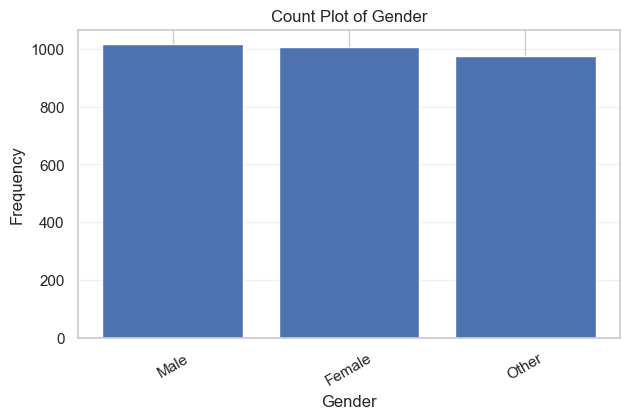

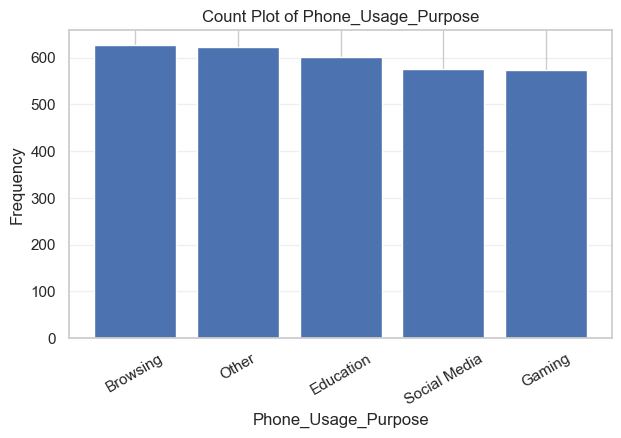

In [14]:
for col in cat_cols:
    plot_categorical(df, col)

Nhóm thực hiện trực quan hoá các biến phân loại bằng biểu đồ cột. Mỗi biểu đồ thể hiện số lượng bản ghi tương ứng với từng giá trị trong cột. Điều này giúp đánh giá mức độ cân bằng hay mất cân bằng của từng biến categorical. Dựa theo biểu đồ, có thể đưa ra nhận xét:
- Biến `Gender` được phân bố tương đối đều giữa các nhóm.
- Biến `Phone_Usage_Purpose` cho thấy sự tập trung cao vào mục đích “Browsing” (lướt web), phản ánh hành vi sử dụng điện thoại của đa số thanh thiếu niên.

#### 2.3.2. Chất lượng của bộ dữ liệu

In [15]:
# 1. Kiểm tra % missing values
missing_cat = df[cat_cols].isnull().mean() * 100
missing_cat

Gender                 0.0
Phone_Usage_Purpose    0.0
dtype: float64

In [16]:
# 2. Những giá trị không đồng nhất của dữ liệu
for col in cat_cols:
    print(f"\n===== {col} =====")
    print(sorted(df[col].unique()))
    
for col in cat_cols:
    cleaned = df[col].str.strip().str.lower()
    if len(cleaned.unique()) != df[col].nunique():
        print(f"{col} has case/spacing inconsistencies!")


===== Gender =====
['Female', 'Male', 'Other']

===== Phone_Usage_Purpose =====
['Browsing', 'Education', 'Gaming', 'Other', 'Social Media']


In [17]:
# 3. Những giá trị bất thường của dữ liệu
for col in cat_cols:
    print(f"\n{col} value counts:")
    print(df[col].value_counts())


Gender value counts:
Gender
Male      1016
Female    1007
Other      977
Name: count, dtype: int64

Phone_Usage_Purpose value counts:
Phone_Usage_Purpose
Browsing        627
Other           622
Education       602
Social Media    575
Gaming          574
Name: count, dtype: int64


In [18]:
# 4. Những giá trị chỉ xuất hiện trên rất ít records
for col in cat_cols:
    print(f"\n===== Rare categories in {col} =====")
    print(df[col].value_counts()[df[col].value_counts() < 10])


===== Rare categories in Gender =====
Series([], Name: count, dtype: int64)

===== Rare categories in Phone_Usage_Purpose =====
Series([], Name: count, dtype: int64)


Như vậy:

1. Missing Values:
Không có giá trị thiếu nào trong hai cột categorical (0%).

2. Category Inconsistencies:
Không phát hiện lỗi phân loại như khác biệt giữa chữ hoa/chữ thường (“male” vs “Male”), dấu cách dư, hoặc sai chính tả. Các giá trị trong từng cột được mã hoá nhất quán.

3. Unexpected / Abnormal Values:
Không xuất hiện giá trị bất thường như “Unknown”, “???”, hoặc giá trị số trong biến phân loại. Tất cả giá trị đều hợp lệ theo ngữ nghĩa của cột.

4. Rare Categories:
Không xuất hiện giá trị ít bất thường trong `Phone_Usage_Purpose`. Tất cả giá trị đều hợp lệ theo ngữ nghĩa của cột và được phân bố tương đối đều.

**Kết luận:**
Các biến categorical trong bộ dữ liệu có chất lượng cao, không phát hiện inconsistency hay lỗi nhập liệu. Nhóm **không** cần xử lý missing values cho các cột categorical.

### **2.4. Mối quan hệ & Tương quan**
#### 2.4.1. Preliminary Patterns

In [19]:
# 1. Tạo Correlation Matrix cho Numerical Columns

corr_matrix = df[numeric_cols].corr()
print("===== CORRELATION MATRIX =====")
corr_matrix

===== CORRELATION MATRIX =====


,Age,School_Grade,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,Exercise_Hours,Anxiety_Level,Depression_Level,Self_Esteem,Parental_Control,Screen_Time_Before_Bed,Phone_Checks_Per_Day,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Family_Communication,Weekend_Usage_Hours,Addiction_Level
Age,1.000000,0.007835,0.040689,0.014725,0.023481,-0.020240,0.001187,0.014651,0.052699,-0.033177,0.028212,0.007213,-0.008696,-0.003000,-0.005100,-0.008967,0.008372,-0.003813,0.002801,0.031306
School_Grade,0.007835,1.000000,-0.019139,-0.032462,0.035922,0.006131,-0.012852,-0.002490,-0.008615,-0.021611,0.002950,-0.006182,0.004399,0.013229,-0.015992,-0.018883,0.002784,0.019660,-0.011634,-0.005825
Daily_Usage_Hours,0.040689,-0.019139,1.000000,0.016444,0.021345,-0.030383,-0.005930,-0.007221,0.009672,0.006340,0.000970,0.004935,0.004749,0.022841,-0.012620,-0.010371,0.014265,0.004427,0.019551,0.600771
Sleep_Hours,0.014725,-0.032462,0.016444,1.000000,-0.000273,-0.017898,0.006814,0.009836,-0.011518,0.016488,0.005670,-0.004313,0.005198,0.026436,-0.018288,0.005798,-0.009756,-0.027040,-0.003670,-0.216681
Academic_Performance,0.023481,0.035922,0.021345,-0.000273,1.000000,0.011815,-0.002509,0.003427,-0.026509,-0.005459,0.003186,-0.005825,-0.017102,-0.026136,0.036357,-0.033734,0.016377,-0.027859,0.014263,0.012264
Social_Interactions,-0.020240,0.006131,-0.030383,-0.017898,0.011815,1.000000,0.005955,0.004341,0.024195,0.008314,-0.023291,-0.019066,0.011992,-0.025440,0.002776,-0.004920,-0.008254,0.004239,-0.021410,-0.010631
Exercise_Hours,0.001187,-0.012852,-0.005930,0.006814,-0.002509,0.005955,1.000000,0.004525,-0.011770,-0.014320,0.020701,0.017109,-0.013038,-0.006264,-0.018977,-0.006999,0.017003,0.006452,0.039873,-0.021015
Anxiety_Level,0.014651,-0.002490,-0.007221,0.009836,0.003427,0.004341,0.004525,1.000000,0.018607,0.003951,-0.011530,-0.004732,0.017988,0.007416,-0.002736,0.014677,0.024640,0.011090,0.006720,0.016005
Depression_Level,0.052699,-0.008615,0.009672,-0.011518,-0.026509,0.024195,-0.011770,0.018607,1.000000,-0.026647,0.014949,-0.028389,-0.001146,0.019049,0.001758,-0.008951,-0.028613,-0.012720,-0.005490,0.008491
Self_Esteem,-0.033177,-0.021611,0.006340,0.016488,-0.005459,0.008314,-0.014320,0.003951,-0.026647,1.000000,-0.028093,0.003562,-0.005905,-0.027416,-0.009075,-0.007537,-0.008804,-0.026098,-0.040673,-0.022292


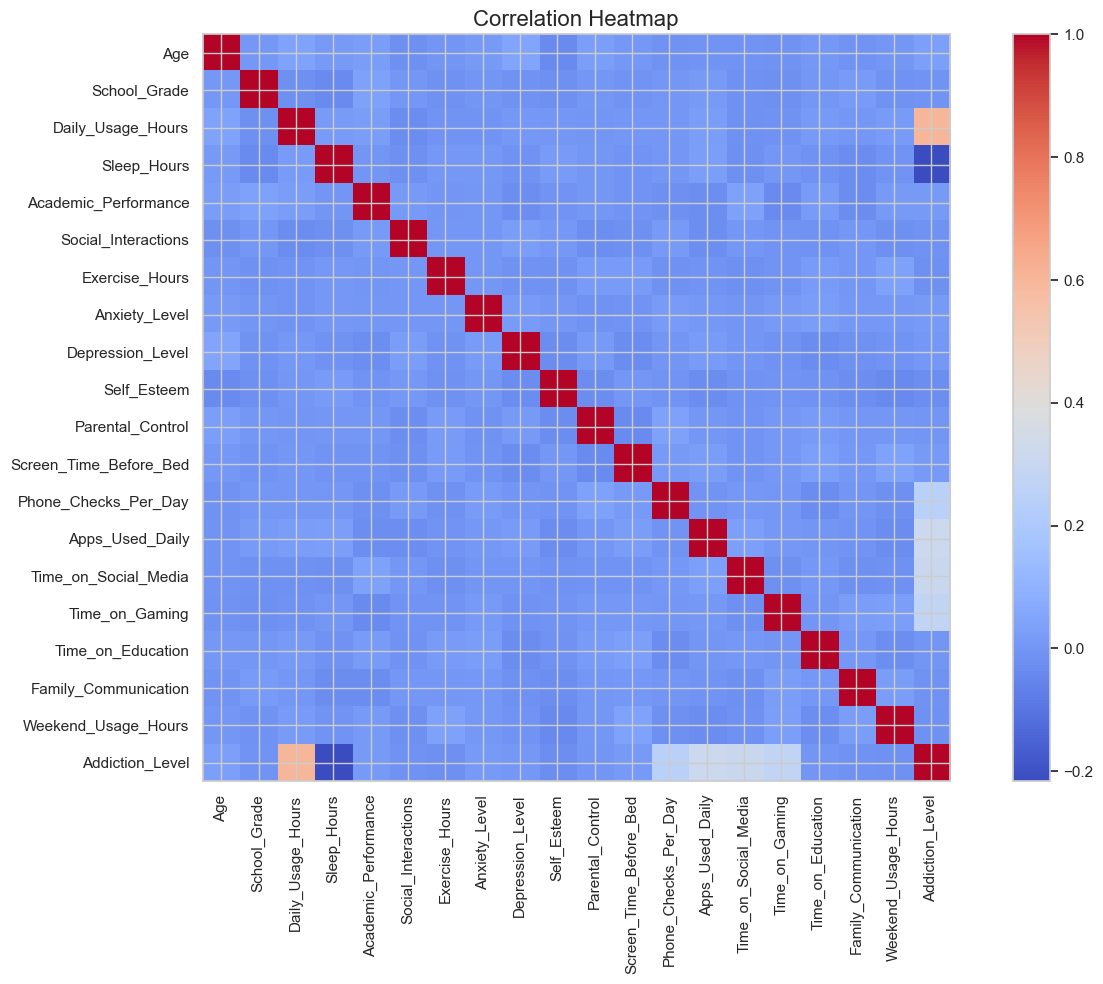

In [20]:
# 2. Heatmap

plot_heatmap(corr_matrix)

In [21]:
# 3. Tìm các cặp tương quan mạnh

strong_corr = []

for col1 in numeric_cols:
    for col2 in numeric_cols:
        if col1 != col2:
            r = corr_matrix.loc[col1, col2]
            if abs(r) > 0.5:
                strong_corr.append((col1, col2, r))

strong_corr

clean_pairs = []
seen = set()

for a, b, r in strong_corr:
    if (b, a) not in seen:
        clean_pairs.append((a, b, r))
        seen.add((a, b))

clean_pairs

[('Daily_Usage_Hours', 'Addiction_Level', np.float64(0.6007705858449478))]

Sau khi tính toán ma trận tương quan và lọc các cặp có độ tương quan mạnh, chỉ có một cặp biến duy nhất thể hiện mối quan hệ mạnh:

`Daily_Usage_Hours` + `Addiction_Level`
- Cho thấy thời gian sử dụng điện thoại trong ngày có liên hệ khá chặt chẽ với mức độ nghiện điện thoại.
- Đây là mối quan hệ hợp lý và phù hợp với kỳ vọng, vì mức độ nghiện tăng lên khi thời gian sử dụng điện thoại cao hơn.

Một số pattern dù không mạnh (>0.5) nhưng có ý nghĩa thực tế:
- `Time_on_Social_Media` + `Addiction_Level` (r ≈ 0.3–0.4): Người dùng mạng xã hội nhiều thì mức độ "nghiện" cao.
- `Time_on_Gaming` + `Addiction_Level` (r ≈ 0.3–0.4): Cũng tương tự như trên, người có thói quen chơi game nhiều thì mức độ "nghiện" cao.
- `Sleep_Hours` + `Addiction_Level` (r âm nhẹ): Càng dùng điện thoại nhiều thì thời gian ngủ sẽ càng ít.

**Điều làm nhóm bất ngờ:** `Academic_Performance` và `Addiction_Level` không liên quan mạnh với nhau. Điều này ngược lại với "mặc định" của các bậc phụ huynh: Càng sa lầy vào điện thoại thì học hành càng sa sút. Nhưng không thể chứng minh được đây là dữ liệu đúng 100% do chỉ được thu thập thông qua khảo sát, sẽ có những bạn trả lời thật và cũng sẽ có những bạn trả lời không thật lòng.

Nhìn chung, bộ dữ liệu có mức tương quan thấp toàn cục, phù hợp để thử nghiệm các thuật toán machine learning, nhưng cũng cho thấy mối quan hệ tuyến tính giữa các hành vi là yếu.

#### 2.4.2. Cross-tabulations

In [22]:
# 1. Categorical x Categorical: Frequency Tables

ct_gender_purpose = pd.crosstab(df["Gender"], df["Phone_Usage_Purpose"])
print(ct_gender_purpose)

Phone_Usage_Purpose  Browsing  Education  Gaming  Other  Social Media
Gender                                                               
Female                    219        174     199    232           183
Male                      221        209     191    191           204
Other                     187        219     184    199           188


Dựa trên bảng tần suất giữa `Gender` và `Phone_Usage_Purpose`, có thể thấy rằng không có sự chênh lệch quá lớn giữa các nhóm giới tính về số lượng người sử dụng điện thoại cho từng mục đích.
- Nhóm Female có xu hướng sử dụng điện thoại nhiều nhất cho mục đích Other (232) và Browsing (219).
- Nhóm Male phân bố khá đồng đều, với tần suất cao nhất ở Browsing (221) và Education (209).
- Nhóm Other (giới tính khác) có số lượng sử dụng cao ở Education (219) và Other (199).

Nhìn tổng thể, không có mục đích sử dụng nào bị chi phối bởi một giới tính cụ thể. Mỗi giới đều có phân bố tương đối cân bằng trên các loại hoạt động (Browsing, Education, Gaming, Other, Social Media).

Điều này cho thấy rằng mục đích sử dụng điện thoại mang tính phổ quát, không bị ảnh hưởng mạnh bởi giới tính. Các hành vi sử dụng điện thoại trong tập dữ liệu này thể hiện sự đa dạng nhưng không có sự thiên lệch lớn giữa các nhóm giới.

In [23]:
# 2. Numerical × Categorical: Grouped Summary Statistics

for cat in cat_cols:
    print(f"\n===== Grouped Summary: {cat} =====\n")
    summary = df.groupby(cat, observed=True)[numeric_cols].agg(['mean', 'median', 'std'])
    display(summary)


===== Grouped Summary: Gender =====



Age                  School_Grade                   \
             mean median       std         mean median       std   
Gender                                                             
Female  15.964250   16.0  1.959002     9.447865    9.0  1.719671   
Male    16.045276   16.0  2.017636     9.564961   10.0  1.687892   
Other   15.896622   16.0  1.990386     9.543501   10.0  1.739253   

       Daily_Usage_Hours                  Sleep_Hours  ... Time_on_Education  \
                    mean median       std        mean  ...               std   
Gender                                                 ...                     
Female          5.052532    5.0  1.943586    6.499206  ...          0.655833   
Male            5.054626    5.0  1.996751    6.502854  ...          0.647245   
Other           4.952508    4.9  1.927507    6.466428  ...          0.638658   

       Family_Communication                  Weekend_Usage_Hours         \
                       mean median       std                mean median   
Gender                                                                    
Female             5.542205    6.0  2.864390            6.071500    6.1   
Male               5.392717    5.0  2.873748            5.952461    5.9   
Other              5.444217    5.0  2.856042            6.022108    6.0   

                 Addiction_Level                   
             std            mean median       std  
Gender                                             
Female  2.048166        8.950645   10.0  1.505998  
Male    2.001505        8.867323   10.0  1.650954  
Other   1.993946        8.826203    9.9  1.667447  

[3 rows x 60 columns]


===== Grouped Summary: Phone_Usage_Purpose =====



Age                  School_Grade                   \
                          mean median       std         mean median       std   
Phone_Usage_Purpose                                                             
Browsing             15.858054   16.0  2.007322     9.596491   10.0  1.723226   
Education            16.079734   16.0  2.024054     9.516611    9.0  1.666112   
Gaming               15.986063   16.0  1.986819     9.437282    9.0  1.763129   
Other                15.943730   16.0  1.971222     9.522508   10.0  1.683100   
Social Media         15.987826   16.0  1.955478     9.513043   10.0  1.746900   

                    Daily_Usage_Hours                  Sleep_Hours  ...  \
                                 mean median       std        mean  ...   
Phone_Usage_Purpose                                                 ...   
Browsing                     5.095375    5.0  2.000989    6.476077  ...   
Education                    4.935050    5.0  2.001983    6.598505  ...   
Gaming                       5.090244    5.1  1.951446    6.371777  ...   
Other                        5.105788    5.0  1.837969    6.522347  ...   
Social Media                 4.867304    4.9  1.982504    6.473391  ...   

                    Time_on_Education Family_Communication                   \
                                  std                 mean median       std   
Phone_Usage_Purpose                                                           
Browsing                     0.624064             5.365231    5.0  2.797009   
Education                    0.629148             5.491694    5.0  2.875815   
Gaming                       0.664392             5.663763    6.0  2.900956   
Other                        0.665312             5.355305    5.0  2.850114   
Social Media                 0.661060             5.438261    6.0  2.903068   

                    Weekend_Usage_Hours                  Addiction_Level  \
                                   mean median       std            mean   
Phone_Usage_Purpose                                                        
Browsing                       6.018022   6.00  2.033885        8.903987   
Education                      6.052492   6.00  1.989306        8.850997   
Gaming                         6.028746   6.10  2.144678        8.957317   
Other                          5.951447   5.95  1.945453        8.941158   
Social Media                   6.028000   6.00  1.965051        8.750783   

                                      
                    median       std  
Phone_Usage_Purpose                   
Browsing              10.0  1.556343  
Education             10.0  1.647377  
Gaming                10.0  1.531624  
Other                 10.0  1.589765  
Social Media           9.7  1.717210  

[5 rows x 60 columns]

1. Theo `Gender`
Từ bảng thống kê mean – median – std của từng nhóm Female, Male, Other, ta rút ra:
- Các nhóm giới tính có đặc điểm rất tương đồng
    - `Age`: trung bình khoảng ~16 tuổi cho mọi giới.
    - `School_Grade`: median = 10 hoặc 9 cho tất cả.
    - `Daily_Usage_Hours`: 5.05 hoặc 4.95 cho tất cả.
    - `Sleep_Hours`: tương đương giữa các giới
    - `Time_on_Education`, `Family_Communication`, `Weekend_Usage_Hours`: gần như không đổi.
    - `Addiction_Level`: gần như giống nhau.

**Kết luận theo Gender:**
- Khi xét theo giới tính, các thống kê mô tả cho thấy sự khác biệt giữa các nhóm Female, Male và Other là rất nhỏ trên hầu hết các biến số như tuổi, thời gian học, thời gian sử dụng điện thoại, thời gian ngủ hay mức độ nghiện sử dụng điện thoại.
- Điều này chứng minh rằng giới tính **không phải là yếu tố tác động** đáng kể đến hành vi sử dụng smartphone cũng như mức độ nghiện trong bộ dữ liệu này. Cấu trúc dữ liệu giữa các nhóm giới rất đồng nhất.

2. Theo `Phone_Usage_Purpose`
Các nhóm gồm: Browsing, Education, Gaming, Other, Social Media.
- `Age` và `School_Grade`: không khác biệt.
- `Daily_Usage_Hours`: gần như giống nhau.
- `Sleep_Hours`, `Exercise_Hours`, `Communication`, `Weekend` : không thay đổi nhiều.
- `Addiction_Level`: cũng rất gần nhau.
  
**Kết luận theo Phone_Usage_Purpose:** 
- Khi phân tích theo mục đích sử dụng điện thoại, các nhóm Browsing, Education, Gaming, Other và Social Media có các đặc tính thống kê gần như trùng nhau.
- Thời gian dùng điện thoại trung bình chỉ khác biệt 0.2–0.3 giờ, trong khi thời gian ngủ, giao tiếp gia đình, hoạt động cuối tuần và đặc biệt là `Addiction_Level` đều có sự phân bố gần như đồng nhất.
- Điều này cho thấy rằng mục đích sử dụng điện thoại **không phải là yếu tố phân tách** rõ rệt hành vi hay mức độ nghiện trong dataset này.

### **2.5. Initial Observations & Insights**
#### 2.5.1. Tổng kết
##### 2.5.1.1. Key Observations

**1. Dữ liệu sạch và khá chuẩn hóa**
- Bộ dữ liệu hoàn toàn không có dòng thiếu thông tin.
- Không có dòng nào bị lặp, không có giá trị âm, không có giá trị vượt phạm vi logic.
- Hai biến categorical (`Gender`, `Phone_Usage_Purpose`) đồng nhất, không có lỗi chính tả, khác viết hoa/thường hay kí tự lạ.

**2. Một số biến numeric có phân phối lệch nhẹ**
- `Daily_Usage_Hours`, `Exercise_Hours`, `Weekend_Usage_Hours` hơi lệch phải.
- `Addiction_Level` chủ yếu tập trung ở mức cao (8–10), phản ánh xu hướng nghiện điện thoại khá phổ biến trong nhóm thanh thiếu niên.

**3. Outliers xuất hiện nhưng phần lớn là hợp lý**
- Nhiều outliers ở `Daily_Usage_Hours`, `Exercise_Hours`, `Addiction_Level`.
- Riêng `Addiction_Level` có 96 outliers theo IQR, nhưng do thang đo 0–10, các giá trị thấp bị xem là outlier vì đa số giới trẻ “nghiện” nặng nên đây là dữ liệu 'extreme' nhưng có thật, không phải lỗi nhập liệu.

**4. Mối liên hệ giữa các biến khá yếu**
- Hầu hết các tương quan đều < 0.1, mối quan hệ tuyến tính giữa các hành vi yếu.
- Chỉ có một cặp mạnh: `Daily_Usage_Hours` + `Addiction_Level` (r ≈ 0.60). Nghĩa là: Thời gian dùng điện thoại thông minh càng cao thì mức nghiện càng cao.

**5. Phân phối các biến categorical khá cân bằng**
- `Gender`: Male - Female - Other gần như bằng nhau.
- `Phone_Usage_Purpose`: Browsing, Other, Education chiếm nhiều nhất. Không có category quá ít nên không cần gộp nhóm.

##### 2.5.1.2. Data Quality Issues Detected
Dù dataset sạch, vẫn có vài điểm đáng lưu ý:
**1. Một số biến numeric có nhiều outliers**
`Daily_Usage_Hours`, `Exercise_Hours`, `Weekend_Usage_Hours`, `Addiction_Level`
Nhưng hiện tại đánh giá những giá trị outlier này là hợp lý, KHÔNG phải data error nên không cần xử lý.

**2. Một số cột nên loại khỏi phân tích**
- `Name`: vô nghĩa cho thống kê.
- `ID`: chỉ dùng để tracking, không có ý nghĩa trong ML.
- `Location`: không liên quan nhiều đến chủ đề.

##### 2.5.1.3. Necessary Preprocessing Steps
1. Loại bỏ các cột không cần: `Name`, `ID`, `Location` (đã thực hiện).
2. Thay đổi kiểu dữ liệu: (đã thực hiện)
    - `Gender`, `Phone_Usage_Purpose` thành categorical.
    - `School_Grade` chuyển từ “9th” thành 9 (int).
3. Handle outliers.
4. Encoding categorical.
5. Scaling.

##### 2.5.1.4. From Interesting Patterns to Research Questions
Dựa trên xu hướng trong bộ dữ liệu, có thể mở ra nhiều hướng nghiên cứu:

1. Càng dùng điện thoại nhiều thì càng định nghĩa việc nghiện điện thoại rõ rệt? `Daily_Usage_Hours` + `Addiction_Level`

2. Có phải thanh thiếu niên càng ít giao tiếp với gia đình thì càng dễ nghiện điện thoại hơn? `Family_Communication` + `Addiction_Level`

3. Những người có tương tác xã hội cao có dùng điện thoại ít hơn không? `Social_Interactions` + `Daily_Usage_Hours` + `Addiction_Level`

4. Thời gian ngủ ít đi do sử dụng điện thoại nhiều có làm mức độ lo âu hoặc trầm cảm cao hơn không? `Sleep_Hours` + `Anxiety_Level` + `Depression_Level` + `Daily_Usage_Hours` + `Addiction_Level`

#### 2.5.2. Red Flags

**1. “Addiction_Level” phân phối rất lệch**
- Quá nhiều giá trị 9–10 làm phân phối bị skew nặng.
- Khi làm ML, mô hình có thể thiên vị class “cao”.

**2. Một số biến thuộc thang đo 0–10 nhưng không theo phân phối chuẩn**

Điểm như `Anxiety`, `Depression`, `Self-esteem` trải đều nên cần cẩn trọng khi phân tích tâm lý.

**3. Correlation tổng thể quá thấp**

Các mô hình linear hoặc logistic có thể hoạt động kém.

## **3. Question formulation**
### 3.1. Có thể dự đoán mức độ nghiện điện thoại của một thiếu niên dựa trên các đặc điểm hành vi sử dụng thường ngày hay không?
- Kết hợp giữa `Addiction_Level` và `Daily_Usage_Hours`, `Phone_Checks_Per_Day`, `Time_on_Social_Media`.
- Lợi ích khi phân tích câu hỏi này:
    - Dự đoán được `Addiction_Level` giúp phát hiện sớm nhóm nguy cơ cao.
    - Phụ huynh, nhà trường, và chuyên gia tâm lý đều quan tâm để hỗ trợ giáo dục sức khỏe tinh thần cho các em.
    - Mô hình học máy giúp xác định yếu tố nào ảnh hưởng mạnh nhất, từ đó can thiệp đúng trọng điểm (ví dụ: giảm thời gian sử dụng mạng xã hội).
### 3.2. Có phải thanh thiếu niên càng ít giao tiếp với gia đình thì càng dễ nghiện điện thoại hơn? 
- Kết hợp giữa `Family_Communication` và `Addiction_Level`.
- Lợi ích khi phân tích câu hỏi này:
    - Gia đình là yếu tố quan trọng trong sức khỏe tinh thần. Theo nghiên cứu, rất nhiều người bị trầm cảm, lo âu nếu họ từng sống trong một gia đình bạo lực, thiếu gắn kết giữa các thành viên. Những người này sẽ dần khép mình lại với xã hội và tìm đến các thiết bị điện tử để có cảm giác như đang sống trong một thế giới "không ai có thể tổn thương mình".
    - Nếu `Family_Communication` thấp nhưng `Addiction_Level cao` thì là dấu hiệu cần can thiệp.
    - Kết quả giúp đề xuất chương trình hỗ trợ tâm lý học đường hoặc hoạt động kết nối gia đình – học sinh.